<a href="https://colab.research.google.com/github/ngthvan02/RFC/blob/main/FRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

In [ ]:
#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
#train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FRC/train', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 847 images belonging to 24 classes.


In [ ]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/FRC/test', 
                                                
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')

Found 626 images belonging to 24 classes.


In [ ]:
training_set.class_indices

{'CAO_TAN_PHI': 0,
 'CHIU_SANG_HUNG': 1,
 'DOAN_THANH_NAM': 2,
 'DO_NGOC_HIEU': 3,
 'HO_DANG_TU': 4,
 'HUYNH_TRONG_TRI': 5,
 'NGUYEN_BAO_CHUONG': 6,
 'NGUYEN_DANG_HUY': 7,
 'NGUYEN_HUU_CHI': 8,
 'NGUYEN_LAM_TRUONG': 9,
 'NGUYEN_LE_PHONG': 10,
 'NGUYEN_MINH_TRI': 11,
 'NGUYEN_PHI_THANG': 12,
 'NGUYEN_THANH_TUNG': 13,
 'NGUYEN_THANH_VAN': 14,
 'THAI_VIET_CUONG': 15,
 'TRAN_HAO_DONG': 16,
 'TRAN_KHANH_DUY': 17,
 'TRAN_LE_NHAT_HUY': 18,
 'TRAN_NGOC_SANG': 19,
 'TRAN_SY_VIET': 20,
 'VO_HUYNH_DUY_THANH': 21,
 'VO_NGOC_ANH_TUAN': 22,
 'VU_DUC_BINH': 23}

In [ ]:
test_set.class_indices

{'CAO_TAN_PHI': 0,
 'CHIU_SANG_HUNG': 1,
 'DOAN_THANH_NAM': 2,
 'DO_NGOC_HIEU': 3,
 'HO_DANG_TU': 4,
 'HUYNH_TRONG_TRI': 5,
 'NGUYEN_BAO_CHUONG': 6,
 'NGUYEN_DANG_HUY': 7,
 'NGUYEN_HUU_CHI': 8,
 'NGUYEN_LAM_TRUONG': 9,
 'NGUYEN_LE_PHONG': 10,
 'NGUYEN_MINH_TRI': 11,
 'NGUYEN_PHI_THANG': 12,
 'NGUYEN_THANH_TUNG': 13,
 'NGUYEN_THANH_VAN': 14,
 'THAI_VIET_CUONG': 15,
 'TRAN_HAO_DONG': 16,
 'TRAN_KHANH_DUY': 17,
 'TRAN_LE_NHAT_HUY': 18,
 'TRAN_NGOC_SANG': 19,
 'TRAN_SY_VIET': 20,
 'VO_HUYNH_DUY_THANH': 21,
 'VO_NGOC_ANH_TUAN': 22,
 'VU_DUC_BINH': 23}

In [ ]:
len(training_set)

27

In [ ]:
len(test_set)

20

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam


In [ ]:

# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(24, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                    

In [ ]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])


In [ ]:
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
train = model.fit_generator( training_set, validation_data=test_set, epochs=100, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)


<ipython-input-36-49b82ac91dbb>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator( training_set, validation_data=test_set, epochs=100, steps_per_epoch=len(training_set),


Epoch 1/100
27/27 [==============================] - 15s 500ms/step - loss: 3.0806 - accuracy: 0.0956 - val_loss: 2.9527 - val_accuracy: 0.1102
Epoch 2/100
27/27 [==============================] - 13s 464ms/step - loss: 2.4895 - accuracy: 0.2527 - val_loss: 2.1805 - val_accuracy: 0.3818
Epoch 3/100
27/27 [==============================] - 13s 474ms/step - loss: 1.4447 - accuracy: 0.6068 - val_loss: 0.9479 - val_accuracy: 0.7252
Epoch 4/100
27/27 [==============================] - 8s 284ms/step - loss: 0.5561 - accuracy: 0.8548 - val_loss: 0.6192 - val_accuracy: 0.8243
Epoch 5/100
27/27 [==============================] - 8s 291ms/step - loss: 0.4457 - accuracy: 0.8772 - val_loss: 0.4654 - val_accuracy: 0.8546
Epoch 6/100
27/27 [==============================] - 7s 255ms/step - loss: 0.3014 - accuracy: 0.9079 - val_loss: 0.2598 - val_accuracy: 0.9281
Epoch 7/100
27/27 [==============================] - 7s 272ms/step - loss: 0.2136 - accuracy: 0.9303 - val_loss: 0.3361 - val_accuracy: 0.9

In [ ]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.09926246106624603
Test accuracy: 0.9824281334877014


In [ ]:
y_pred = model.predict_generator(test_set)
y_pred_class = y_pred > 0.5
y_pred_class

<ipython-input-38-467eccc537b7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

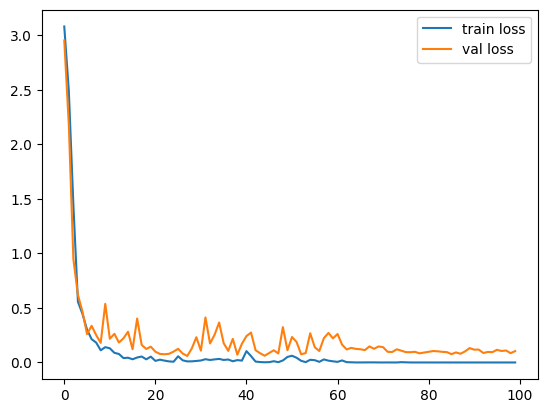

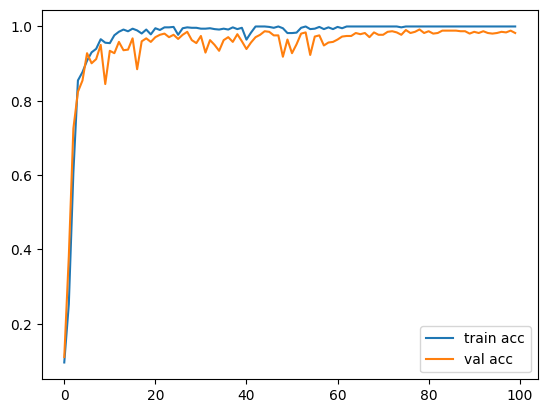

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(train.history['accuracy'], label='train acc')
plt.plot(train.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Lưu a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/FRC/model_inception.h5')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/FRC/val')

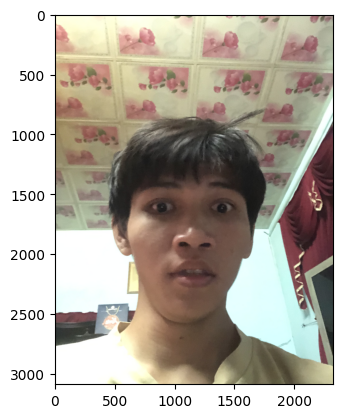

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/FRC/val/1.jpg') 
img_data = img_to_array(img_data)
plt.imshow(img_data/255)


In [ ]:
training_set.class_indices

{'CAO_TAN_PHI': 0,
 'CHIU_SANG_HUNG': 1,
 'DOAN_THANH_NAM': 2,
 'DO_NGOC_HIEU': 3,
 'HO_DANG_TU': 4,
 'HUYNH_TRONG_TRI': 5,
 'NGUYEN_BAO_CHUONG': 6,
 'NGUYEN_DANG_HUY': 7,
 'NGUYEN_HUU_CHI': 8,
 'NGUYEN_LAM_TRUONG': 9,
 'NGUYEN_LE_PHONG': 10,
 'NGUYEN_MINH_TRI': 11,
 'NGUYEN_PHI_THANG': 12,
 'NGUYEN_THANH_TUNG': 13,
 'NGUYEN_THANH_VAN': 14,
 'THAI_VIET_CUONG': 15,
 'TRAN_HAO_DONG': 16,
 'TRAN_KHANH_DUY': 17,
 'TRAN_LE_NHAT_HUY': 18,
 'TRAN_NGOC_SANG': 19,
 'TRAN_SY_VIET': 20,
 'VO_HUYNH_DUY_THANH': 21,
 'VO_NGOC_ANH_TUAN': 22,
 'VU_DUC_BINH': 23}

Chọn image : 4
1/1 [==============================] - 0s 38ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Viet
Chọn image : -


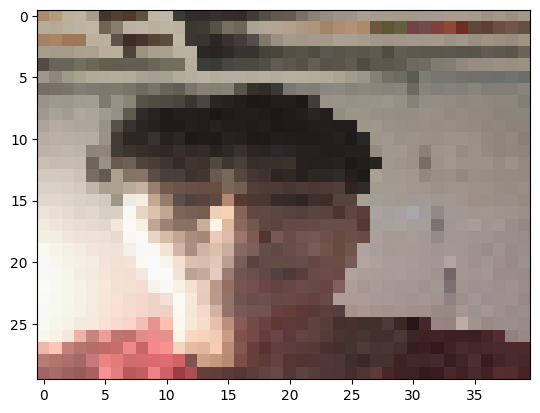

In [ ]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/FRC/val/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<24):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x<=0 and c>=24) :
         c=24
     if c == 0:
       prediction = 'Phi'
     elif c == 1:
       prediction = 'Hung'
     elif c == 2:
       prediction = 'Nam'
     elif c == 3:
       prediction = 'Hieu'
     elif c == 4:
       prediction = 'Tu'
     elif c ==5:
       prediction ='TTri'
     elif c == 6:
       prediction = 'Chuong'
     elif c == 7:
       prediction = 'DHuy'
     elif c == 8:
       prediction = 'Chi'
     elif c == 9:
       prediction = 'Truong'
     elif c == 10:
       prediction = 'Phong'
     elif c == 11:
       prediction = 'MTri'
     elif c == 12:
       prediction = 'Thang'
     elif c == 13:
       prediction ='Tung'
     elif c == 14:
       prediction = 'Van'
     elif c == 15:
       prediction = 'Cuong'
     elif c == 16:
       prediction = 'Dong'
     elif c == 17:
       prediction = 'Duy'
     elif c == 18:
       prediction = 'Huy'
     elif c == 19:
       prediction ='Sang'
     elif c == 20:
       prediction = 'Viet'
     elif c == 21:
       prediction = 'Thanh'
     elif c == 21:
       prediction = 'Tuan'
     elif c == 23:
       prediction = 'Binh'     
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.1 MB/s eta 0:00:00
